# Multiple Variable Regression with SKLEARN

What type of data are we looking at in this example?

We are going to look at how advertising dollars affects sales. Advertising is spent on TV, Radio, and Newspaper Ads 


The **Independent variables**?
- x1 -> TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- x2 -> Radio: advertising dollars spent on Radio (in thousands of dollars)
- x3 -> Newspaper: advertising dollars spent on Newspaper (in thousands of dollars)

The **Dependent Variables**?
- y -> Sales: sales of a single product in a given market (in thousands of widgets)


In order to access some function in our code we need to load the libraries into our program
- Numpy Library so we can use matrices
- Sklearn Libary so we can do the linear regression
- matplotlib so we can plot the data



In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 

Let's get the data into regular python lists for analysis

In [2]:
import os
path = os.getcwd() + '\data2.txt'

x1=[]
x2=[]
x3=[]
y=[]
file = open(path,"r")
while True:
    line = file.readline()
    if not line:
        break
    else:
        values = line.split(",")
        x1.append(float(values[0]))
        x2.append(float(values[1]))
        x3.append(float(values[2]))
        y.append(float(values[3].rstrip("\n")))
file.close()

Looking at the data

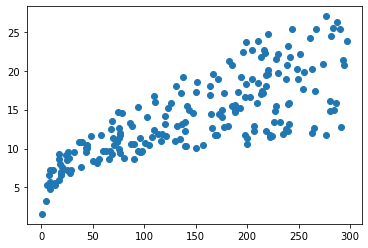

In [3]:
plt.plot(x1,y, 'o')

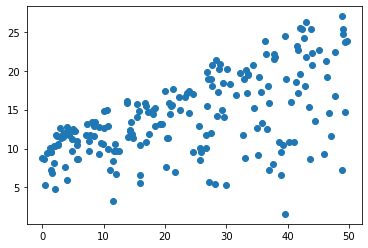

In [4]:
plt.plot(x2,y, 'o')

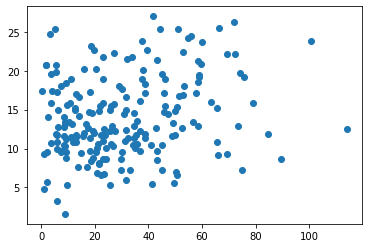

In [5]:
plt.plot(x3,y,'o')

Getting the data ready for the Linear Regression in SKLEARN
- All the data needs to be converted to a column matrix 
- The x data set is the combined x1,x2,x3 matrix where x1 is column1, x2 is column2, x3 is column3



In [6]:
x1 = np.matrix(x1).T
x2 = np.matrix(x2).T
x3 = np.matrix(x3).T
y = np.matrix(y).T

x = np.hstack((x1,x2,x3))
x = np.matrix(x)
print(x)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

We start the linear regression using a function called LinearRegression and store all its properties in a variables.  We can then use that variable to perform tasks on the linear regression

In [7]:
lm = LinearRegression()

Now we can build the line of best fit and get the theta values.

In [8]:
lm.fit(x,y)
theta0 = lm.intercept_[0]
theta1 = lm.coef_[0][0]
theta2 = lm.coef_[0][1]
theta3 = lm.coef_[0][2]
print("The equation that best models our data is:")
print("y=",theta0,"+",theta1,"*X1 +",theta2,"*X2 +",theta3,"*X3")


The equation that best models our data is:
y= 2.938889369459403 + 0.045764645455397615 *X1 + 0.18853001691820448 *X2 + -0.001037493042476273 *X3


Make some Predictions about future data using the model

In [9]:
#Using the prediction function
p1 = lm.predict([[230,68,49]])
print(p1)


[[26.23396182]]


# Question #1

Still considering the data from the example, print the number of widgets produced for the following advertising dollars (Remember the model is in 1000's of dollars)

-  250000 on TV,  50000 on Radio, 25000 on Newspaper
-  45000 on TV,  750000 on Radio, 450000 on Newspaper
-  975000 on TV, 20000 on Radio, 300000 on Newspaper

  

In [10]:
#----WRITE YOUR ANSWER HERE
print(lm.predict([[250,50,25]]))
print(lm.predict([[45,750,450]]))
print(lm.predict([[975,20,300]]))




[[23.78061425]]
[[145.92893923]]
[[51.01877111]]


# Question #2


Sales vs. TV 
- Perform a Single Variable Regression and Plot the data and line of best fit

The equation that best models the data set is:
y= 7.032593549127693 + 0.047536640433019764 X


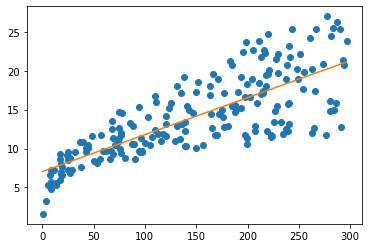

In [11]:
#----WRITE YOUR ANSWER HERE

lm = LinearRegression()
lm.fit(x1,y)
theta0 = lm.intercept_[0]
theta1 = lm.coef_[0][0]
print("The equation that best models the data set is:")
print("y=",theta0, "+", theta1,"X")

lbfY = []
lbfX = []
xMin = int(np.min(x1))
xMax = int(np.max(x1))
for i in range(xMin,xMax+1):
    lbfY.append(theta0 + theta1*i)
    lbfX.append(i)
plt.plot(x1,y,'o')
plt.plot(lbfX,lbfY)

Sales vs. TV
-  Use your regression to predict the values for the number of widgets produced for the following amounts spent (Remember the model is in 1000's of dollars) 
    -  250000
    -  45000
    -  975000

In [12]:
#----WRITE YOUR ANSWER HERE
print(lm.predict([[250]]))
print(lm.predict([[45]]))
print(lm.predict([[975]]))

[[18.91675366]]
[[9.17174237]]
[[53.38081797]]


Sales vs. Radio
- Perform a Single Variable Regression and Plot the data and line of best fit

The equation that best models the data set is:
y= 9.311638095158283 + 0.20249578339243968 X


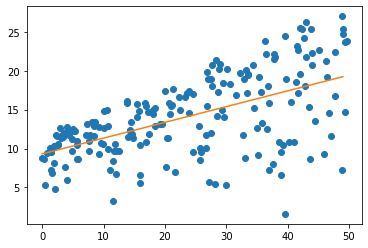

In [13]:
#----WRITE YOUR ANSWER HERE
lm = LinearRegression()
lm.fit(x2,y)
theta0 = lm.intercept_[0]
theta1 = lm.coef_[0][0]
print("The equation that best models the data set is:")
print("y=",theta0, "+", theta1,"X")

lbfY = []
lbfX = []
xMin = int(np.min(x2))
xMax = int(np.max(x2))
for i in range(xMin,xMax+1):
    lbfY.append(theta0 + theta1*i)
    lbfX.append(i)
plt.plot(x2,y,'o')
plt.plot(lbfX,lbfY)




Sales vs. Radio
-  Use your regression to predict the values for the number of widgets produced for the following amounts spent (Remember the model is in 1000's of dollars)     
    -  50000
    -  750000
    -  20000

In [14]:
#----WRITE YOUR ANSWER HERE
print(lm.predict([[50]]))
print(lm.predict([[750]]))
print(lm.predict([[20]]))





[[19.43642726]]
[[161.18347564]]
[[13.36155376]]


Sales vs. Newspaper
- Perform a Single Variable Regression and Plot the data and line of best fit

The equation that best models the data set is:
y= 12.351407069278162 + 0.05469309847227335 X


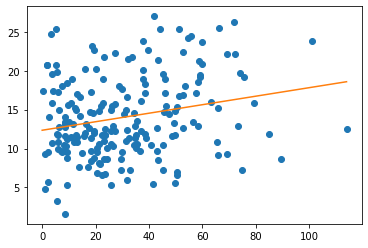

In [15]:
#----WRITE YOUR ANSWER HERE
lm = LinearRegression()
lm.fit(x3,y)
theta0 = lm.intercept_[0]
theta1 = lm.coef_[0][0]
print("The equation that best models the data set is:")
print("y=",theta0, "+", theta1,"X")

lbfY = []
lbfX = []
xMin = int(np.min(x3))
xMax = int(np.max(x3))
for i in range(xMin,xMax+1):
    lbfY.append(theta0 + theta1*i)
    lbfX.append(i)
plt.plot(x3,y,'o')
plt.plot(lbfX,lbfY)





Sales vs. Newspaper
-  Use your regression to predict the values for the number of widgets produced for the following amounts spent (Remember the model is in 1000's of dollars)     
    -  25000
    -  450000
    -  300000

In [16]:
#----WRITE YOUR ANSWER HERE
print(lm.predict([[25]]))
print(lm.predict([[450]]))
print(lm.predict([[300]]))




[[13.71873453]]
[[36.96330138]]
[[28.75933661]]


# Question #3

Use the data you just created to briefly comment on if it is appropriate to perform individual regressions and make accurate predictions compared to the multiple regression done in Question 1 (Notice how the same numbers were used)

In [17]:
"""
----WRITE YOUR ANSWER HERE








"""

'\n----WRITE YOUR ANSWER HERE\n\n\n\n\n\n\n\n\n'

# Question #4

Consider the data in the file **data3.txt** that you downloaded as part of this assignment

The **Independent variables**?
- x1 -> Square Footage
- x2 -> # of Bedrooms

The **Dependent Variable**?
- y -> Price of House

Predict how much the following houses will cost
-  1500 square feet 2 bedrooms
-  3200 square feet 5 bedrooms

In [28]:
#----WRITE YOUR ANSWER HERE
path = os.getcwd() + '\data3.txt'

x1=[]
x2=[]
y=[]
file = open(path,"r")
while True:
    line = file.readline()
    if not line:
        break
    else:
        values = line.split(",")
        x1.append(float(values[0]))
        x2.append(float(values[1]))
        y.append(float(values[2].rstrip("\n")))
file.close()

x1 = np.matrix(x1).T
x2 = np.matrix(x2).T
y = np.matrix(y).T

x = np.hstack((x1,x2))
x = np.matrix(x)

lm = LinearRegression()
lm.fit(x,y)
theta0 = lm.intercept_[0]
theta1 = lm.coef_[0][0]
theta2 = lm.coef_[0][1]
print(theta0+theta1*1500+theta2*2)
print(theta0+theta1*3200+theta2*5)


280937.88234458014
491381.9708375601
